### 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

### 2. Importing the Dataset

In [2]:
TrainDatasetMain = pd.read_excel("Train_dataset.xlsx")
TrainDataset = pd.read_excel("Train_dataset.xlsx", "Diuresis_TS")
TestDataset = pd.read_excel("Test_dataset.xlsx")

### 3. Predicting  Diuresis on 27th March for Train data

The dates from 20th March to 26th March can be taken as 7 days (X).<br>
y_at_20 = Diuresis on 20 March

In [3]:
X = [[1],[2],[3],[4],[5],[6],[7]]
y_at_20 = TrainDataset.iloc[:,1]

Ploting Diuresis on 7 days we can see the relation between Diuresis and number of days. This appears to be a polynomial regression.

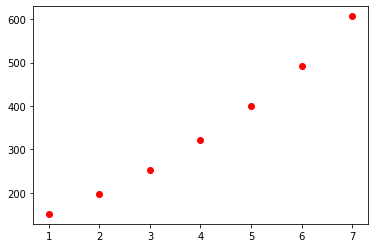

In [4]:
plt.scatter(X,TrainDataset.iloc[1,1:], c="red")

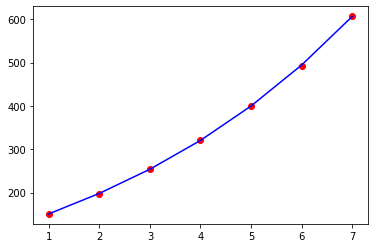

In [5]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
y = TrainDataset.iloc[1,1:].values
lin_reg.fit(X_poly,y)
plt.scatter(X,TrainDataset.iloc[1,1:], c="red")
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)), c="blue")

Polynomial regression of degree 3 fits best for this.<br>
Now, apply Polynomial regression for each People_id and predicting Diuresis on 27th March i.e. the 8th day 

In [6]:
y_at_27 = []
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
for i in range(TrainDataset.shape[0]):
    y = TrainDataset.iloc[i,1:].values
    lin_reg.fit(X_poly,y)
    y_at_27.append(lin_reg.predict(poly_reg.fit_transform([[8]]))[0])

### 4. Finding relation between Diuresis on 20th and 27th 
By ploting we can see that relation between them is linear. So we apply Simple Linear Regression.

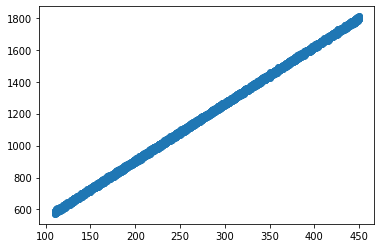

In [7]:
plt.scatter(y_at_20, y_at_27)

In [8]:
regressor = LinearRegression()
regressor.fit((np.array(y_at_20)).reshape(-1, 1),y_at_27)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 5. Predicting Diuresis on 27th for Test data

In [9]:
Diuresis_at_20 = TestDataset.iloc[:,16]
Diuresis_at_27 = regressor.predict((np.array(Diuresis_at_20)).reshape(-1, 1))

Creating csv file Test_Data_27.csv for prediction of infect_prob on 27th March

In [12]:
TestDataset.iloc[:,16] = Diuresis_at_27 
csvFile = open("Test_Data_272.csv", 'a' ,encoding='utf-8')
TestDataset.to_csv(csvFile, index=False)

Using Solution_part1.ipynb we can predict Infect_prob for Test Dataset on 27th March (Test_Data_27.csv). 

Although by ploting Infect_prob vs Diuresis from Train data we can see there is no clear relation between them.

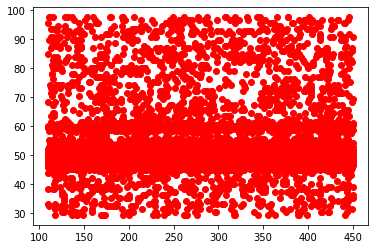

In [11]:
plt.scatter(TrainDatasetMain.iloc[:,16], TrainDatasetMain.iloc[:,-1], color="red")